# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
#### Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [1]:
# my usual imports and setups
import matplotlib.pylab as pl
import pandas as pd
import numpy as np
#imports downloader
#from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

import os
import sys
#this makes my plots pretty! but it is totally not mandatory to do it
import json
#s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)
import datetime as dt

Populating the interactive namespace from numpy and matplotlib


In [2]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")


# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [3]:
datestring = '201501'
getCitiBikeCSV(datestring)

file in place, you can continue


In [4]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [5]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [6]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

# SPLIT BY CATEGORY

as an example I am splitting data by gender and looking at age or riders:

**H0: there is no statistical difference in the age distribution of male and female riders**
$$ \alpha = 0.05 $$

extracting the age happens in the cell below

In [7]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [8]:
#dropping some data I no longer need
#... your code here...
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,ageM,ageF
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00,NaN,55.0
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00,52.0,NaN
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00,41.0,NaN
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00,46.0,NaN
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00,38.0,NaN


In [9]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df.describe()

/nfshome/sz2404/.local/lib/python3.5/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,ageM,ageF
count,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,279924.000000,285552.000000,227764.000000,52093.000000
mean,654.325583,443.535006,40.735804,-73.990177,440.337557,40.735607,-73.990398,18147.291481,1974.951419,1.162485,40.305272,38.951145
std,900.775928,332.580265,0.018773,0.011681,326.010259,0.018718,0.011742,2065.313794,11.574637,0.419490,11.595240,11.405112
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,1899.000000,0.000000,16.000000,17.000000
25%,334.000000,308.000000,40.723627,-73.998102,307.000000,40.723180,-73.998522,16355.000000,NaN,1.000000,NaN,NaN
50%,504.000000,417.000000,40.738274,-73.990093,417.000000,40.737815,-73.990617,18148.000000,NaN,1.000000,NaN,NaN
75%,772.000000,492.000000,40.750450,-73.981854,492.000000,40.750200,-73.981854,19903.000000,NaN,1.000000,NaN,NaN
max,43023.000000,3002.000000,40.771522,-73.950048,3002.000000,40.771522,-73.950048,21690.000000,1999.000000,2.000000,116.000000,89.000000


In [10]:
# dropping NaN values
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)

lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

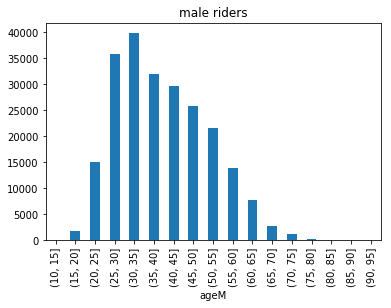

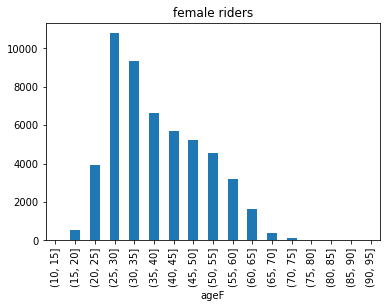

In [11]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders");


**Figure 1: histogrammed distribution of riders' ages by gender **
here is where you should have a nice caption that describes what I am looking at, why I am looking at it, and what I should notice

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.001657
(20, 25]       0.010955
(25, 30]       0.060955
(30, 35]       0.065548
(35, 40]       0.052146
(40, 45]       0.031750
(45, 50]       0.018657
(50, 55]       0.011015
(55, 60]       0.010957
(60, 65]       0.008149
(65, 70]       0.003203
(70, 75]       0.000663
(75, 80]       0.000188
(80, 85]       0.000002
(85, 90]       0.000075
(90, 95]       0.000000


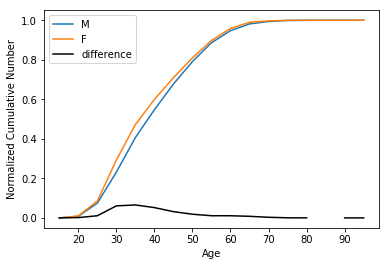

In [12]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 2: the cumulative distribution of CitiBike riders' ages by gender** ... [a good caption here]

The cumulative distribution between male and female are very close to each other. The trend is the same. Between age 30 and 50, there is a slight gap between female and male. 

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [13]:
import scipy.stats
#remember that your imports should all be at the top. I leave it here to hightlight that this package is needed at this point of the workflow

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [14]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
print (ks)

Ks_2sampResult(statistic=0.0674425578022072, pvalue=4.0408611999082294e-168)


**  FILL IN THE CELL BELOW!**

In [15]:
## your words here!...
## this cell is for you to tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS
## to do that refer to the scipy documentation to understand the output of the scipy.stats.ks_2samp function

### My Interpretation
#### D statistic shows maximum distance between the two curves on cumulative sum plot. It shoulds the likelihood of two sample set are different. In this case, the D statistic value is very small, 0.067, very close to 0, therefore, the 2 sample sets (female vs male) are very similarly distributed. 

#### P value is for testing the Null Hypothesis. We have chosed the alpha = 0.05 as significance level. P is way smaller than 0.05, we reject the null hypothesis. 

The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

In [92]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
#from IPython.display import Image
#Image(filename="../plotsforclasses/ks2sample_table.png")

# In our case, we have chosen the significance level of 0.05. c(α) would be 1.36

D_value = 1.36 * sqrt((len(df.ageM) + len(df.ageF))/(len(df.ageM) * len(df.ageF)))
if ks[0] < D_value:
    print ('Please reject the null hypothesis.')
else: 
    print ('Null hypothesis is acceptable.')

Null hypothesis is acceptable.


In [17]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS


# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

### Obtaining subsamples

In [18]:
# Seed it first so can be reproducible
# Slicing and choose rides
np.random.seed(12345)
df.ageMSam = np.arange(0, len(df.ageM), 200)
df.ageF200 = np.arange(0, len(df.ageF), 200)
print(df.ageMSam.size, df.ageF200.size)

1139 261


In [19]:
# The size of two sample groups are not the same, therefore, we reduce the male group here. 
df.ageM200 = np.random.choice(df.ageMSam, size=261)
print(df.ageM200.size)

261


In [20]:
# Now sorting both samples:
df.ageM_S = sorted(df.ageM200)
df.ageF_S = sorted(df.ageF200)

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [21]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis
pearson_value = scipy.stats.pearsonr(df.ageM_S, df.ageF_S)
print("Results of Pearson test:\n","Pearson Coefficient Correlation:", pearson_value[0], "\n", "P-value:",pearson_value[1])

Results of Pearson test:
 Pearson Coefficient Correlation: 0.9982014805538367 
 P-value: 1.3802e-318


### Interpretation
#### The correlation coefficient is super close to 1, demonstrating that the two samples set have selected for testing are having positiviely strong correlation. 

#### P-value is this case, is super small. With such small, less than 0.05, we can reject the null hypothesis, as the distribution are definitely not identical. 

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [22]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis

spearman_value = scipy.stats.spearmanr(df.ageM_S, df.ageF_S)
print("Results of Spearmean test:\n","Spearman rank-order correlation coefficient:", spearman_value[0], "\n", "P-value:",spearman_value[1] )

Results of Spearmean test:
 Spearman rank-order correlation coefficient: 0.9999949379263215 
 P-value: 0.0


** please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??**

### Interpretation
#### The correlation coefficient is super close to 1, demonstrating that the two samples set have selected for testing are having positiviely strong correlation. 

#### P-value is this case, is 0. With p-value = 0,  less than 0.05, we can reject the null hypothesis, as the distribution are definitely not identical. 

# 1. Trip duration of bikers that ride during the day vs night


## Hypothesis Formation

Normally, when people ride during the day, due to traffic congestion and crowds, the ride might tends to be longer. Also, people may use Citibikes for leisure rides. Therefore, the distribution of trip duration, I think day trips might be longer than night trips on time duration. 

### Null Hypothesis: there is no significant statistical difference in the trip duration distribution between day trips and night trips. 
$H_0: T$<sub>$Day$</sub> $= T$<sub>$Night$</sub>

$H_1: T$<sub>$Day$</sub> $\neq$ $T$<sub>$Night$</sub>

$\alpha$ = 0.05

## Import Data

In [23]:
datestring1 = '201708'
getCitiBikeCSV(datestring1)
datestring2 = '201701'
getCitiBikeCSV(datestring2)

file in place, you can continue
file in place, you can continue


In [24]:
dfw = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring1 + '-citibike-tripdata.csv')
dfw.head(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,2110,2017-08-01 00:00:00,2017-08-01 00:35:11,470,W 20 St & 8 Ave,40.743453,-74.000040,3289,W 90 St & Amsterdam Ave,40.790179,-73.972889,20954,Subscriber,1978.0,2
1,160,2017-08-01 00:00:10,2017-08-01 00:02:51,348,W Broadway & Spring St,40.724910,-74.001547,151,Cleveland Pl & Spring St,40.722104,-73.997249,15164,Subscriber,1978.0,1


In [25]:
dfc = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring2 + '-citibike-tripdata.csv')
dfc.head(2)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,2
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,2


In [26]:
# df is the dataframe where the content of the csv file is stored
dfw['date'] = pd.to_datetime(dfw['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
dfw.head(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,2110,2017-08-01 00:00:00,2017-08-01 00:35:11,470,W 20 St & 8 Ave,40.743453,-74.000040,3289,W 90 St & Amsterdam Ave,40.790179,-73.972889,20954,Subscriber,1978.0,2,2017-08-01 00:00:00
1,160,2017-08-01 00:00:10,2017-08-01 00:02:51,348,W Broadway & Spring St,40.724910,-74.001547,151,Cleveland Pl & Spring St,40.722104,-73.997249,15164,Subscriber,1978.0,1,2017-08-01 00:00:10


In [27]:
dfc['date'] = pd.to_datetime(dfc['Start Time'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
dfc.head(2)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,date
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,2,2017-01-01 00:00:21
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,2,2017-01-01 00:00:45


In [28]:
dfw.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [29]:
dfc.columns

Index(['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender', 'date'],
      dtype='object')

In [30]:
# Reset 2017 August data column names so rows can be merged. 
    # Reference: http://jonathansoma.com/lede/foundations/classes/pandas%20columns%20and%20functions/fixing-column-names-in-pandas/
dfw.columns = ['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender', 'date']
dfw.head(3)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,date
0,2110,2017-08-01 00:00:00,2017-08-01 00:35:11,470,W 20 St & 8 Ave,40.743453,-74.000040,3289,W 90 St & Amsterdam Ave,40.790179,-73.972889,20954,Subscriber,1978.0,2,2017-08-01 00:00:00
1,160,2017-08-01 00:00:10,2017-08-01 00:02:51,348,W Broadway & Spring St,40.724910,-74.001547,151,Cleveland Pl & Spring St,40.722104,-73.997249,15164,Subscriber,1978.0,1,2017-08-01 00:00:10
2,1644,2017-08-01 00:00:17,2017-08-01 00:27:41,3165,Central Park West & W 72 St,40.775794,-73.976206,3320,Central Park West & W 100 St,40.793393,-73.963556,17540,Subscriber,1962.0,2,2017-08-01 00:00:17


In [31]:
dfw.describe()

/nfshome/sz2404/.local/lib/python3.5/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,Trip Duration,Start Station ID,Start Station Latitude,Start Station Longitude,End Station ID,End Station Latitude,End Station Longitude,Bike ID,Birth Year,Gender
count,1.816498e+06,1.816498e+06,1.816498e+06,1.816498e+06,1.816498e+06,1.816498e+06,1.816498e+06,1.816498e+06,1.591782e+06,1.816498e+06
mean,1.156788e+03,1.348643e+03,4.073591e+01,-7.398522e+01,1.344118e+03,4.073558e+01,-7.398531e+01,2.363543e+04,1.979760e+03,1.104753e+00
std,1.880521e+04,1.340724e+03,2.925896e-02,1.732094e-02,1.339724e+03,4.200307e-02,5.757763e-02,5.096492e+03,1.153077e+01,5.910403e-01
min,6.100000e+01,7.200000e+01,4.065540e+01,-7.402535e+01,7.200000e+01,0.000000e+00,-7.405570e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,3.950000e+02,3.590000e+02,4.071755e+01,-7.399725e+01,3.590000e+02,4.071749e+01,-7.399726e+01,1.869600e+04,NaN,1.000000e+00
50%,6.710000e+02,4.840000e+02,4.073653e+01,-7.398775e+01,4.830000e+02,4.073649e+01,-7.398783e+01,2.553500e+04,NaN,1.000000e+00
75%,1.171000e+03,3.139000e+03,4.075514e+01,-7.397606e+01,3.137000e+03,4.075510e+01,-7.397621e+01,2.809900e+04,NaN,1.000000e+00
max,4.509256e+06,3.489000e+03,4.550636e+01,-7.356946e+01,3.489000e+03,4.550636e+01,0.000000e+00,3.082700e+04,2.001000e+03,2.000000e+00


In [32]:
# Dropping irrelavant columns before merging. 
# Dropping August Columns
dfw_2c = dfw.drop(['Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender', 'date'], axis=1)
# Dropping January Columns
dfc_2c = dfc.drop(['Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender', 'date'], axis=1)

In [33]:
dfc_2c.head(3)

,Trip Duration,Start Time
0,680,2017-01-01 00:00:21
1,1282,2017-01-01 00:00:45
2,648,2017-01-01 00:00:57


In [34]:
dfw_2c.head(3)

,Trip Duration,Start Time
0,2110,2017-08-01 00:00:00
1,160,2017-08-01 00:00:10
2,1644,2017-08-01 00:00:17


In [35]:
# Now merge the two datasets
 #Reference: https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html
dfens = pd.merge(dfc_2c, dfw_2c, how='outer')
dfens.count()
if len(dfc_2c) + len(dfw_2c) == len(dfens):
    print('Yes, the merge is good')
else:
    print('no')

Yes, the merge is good


In [36]:
dfens.head(3)

,Trip Duration,Start Time
0,680.0,2017-01-01 00:00:21
1,1282.0,2017-01-01 00:00:45
2,648.0,2017-01-01 00:00:57


In [37]:
dfens.dropna(inplace=True)

# Spliting Data Categories

In [38]:
#Formatting the time
    # Reference: https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html
    #
dfens["RideStart"] = pd.to_datetime(dfens['Start Time'])
dfens["RideTime"] = dfens['RideStart'].dt.hour

In [39]:
# I am assuming, day right is between 6am and 6pm; night ride is between 6pm to 6am
    # If statement reference: http://anh.cs.luc.edu/handsonPythonTutorial/ifstatements.html
#def ridehour(RideTime):
 #   if str(Ridetime) >= str(6) and str(Ridetime) < str(18):
  ##      return('Day')
    #else:
     #   return('Night')
    
#dfens['RideType']=ridehour(RideTime)

#def ridetype(hour):
 #   if hour <= 18 and hour > 6:
  #      return "Day"
   # else:
   #     return "Night"
# dfens['RideType'] = dfens['RideTime'].apply(ridetype)
#Print several random lines to verify
# print(dfens.loc[20000], dfens.loc[1000])

In [40]:
dfens.columns

Index(['Trip Duration', 'Start Time', 'RideStart', 'RideTime'], dtype='object')

In [41]:
# Split the two groups by RideTime
#['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
# Here, I tried a lot of times to deal with the 'Series' object not callable error due to the wrong position of brackets.

dfens["DTrips"] = dfens['Trip Duration'][(dfens["RideTime"] >= 6) & (dfens["RideTime"] < 18)]
dfens["NTrips"] = dfens['Trip Duration'][(dfens["RideTime"] < 6) | (dfens["RideTime"] >= 18)]
dfens.head(5)

,Trip Duration,Start Time,RideStart,RideTime,DTrips,NTrips
0,680.0,2017-01-01 00:00:21,2017-01-01 00:00:21,0,NaN,680.0
1,1282.0,2017-01-01 00:00:45,2017-01-01 00:00:45,0,NaN,1282.0
2,648.0,2017-01-01 00:00:57,2017-01-01 00:00:57,0,NaN,648.0
3,631.0,2017-01-01 00:01:10,2017-01-01 00:01:10,0,NaN,631.0
4,621.0,2017-01-01 00:01:25,2017-01-01 00:01:25,0,NaN,621.0


In [87]:
# Eliminating the NaN
dfens["DTrips"].dropna(inplace=True)
dfens["NTrips"].dropna(inplace=True)

Text(0.5,1,'Night Trips')

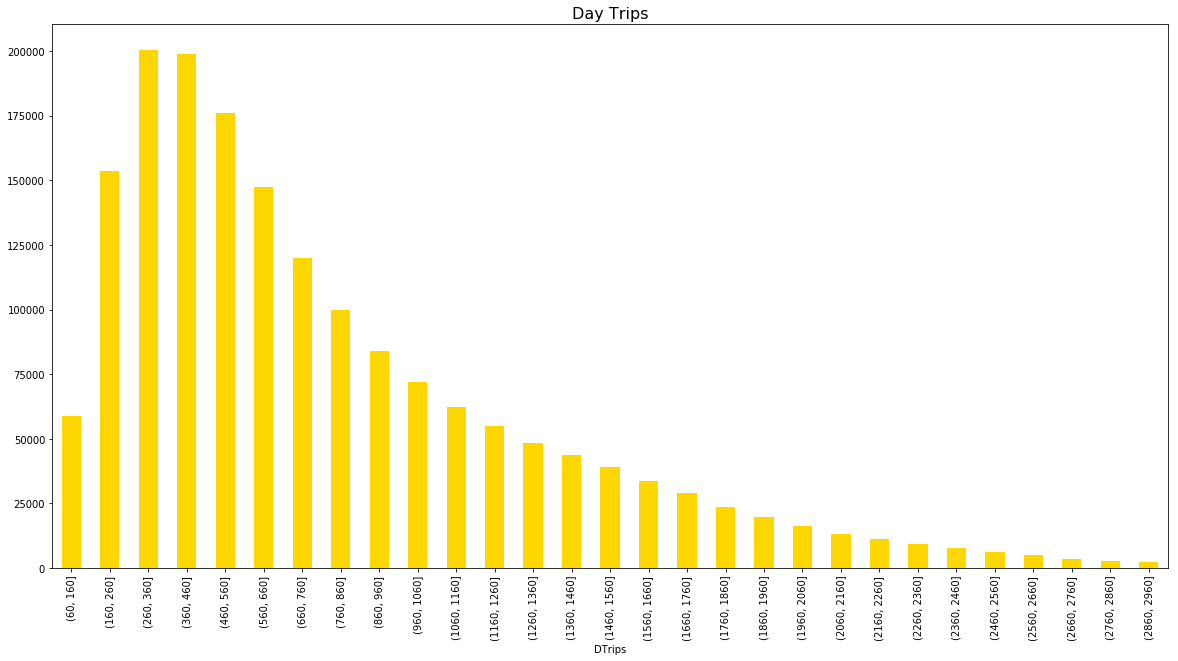

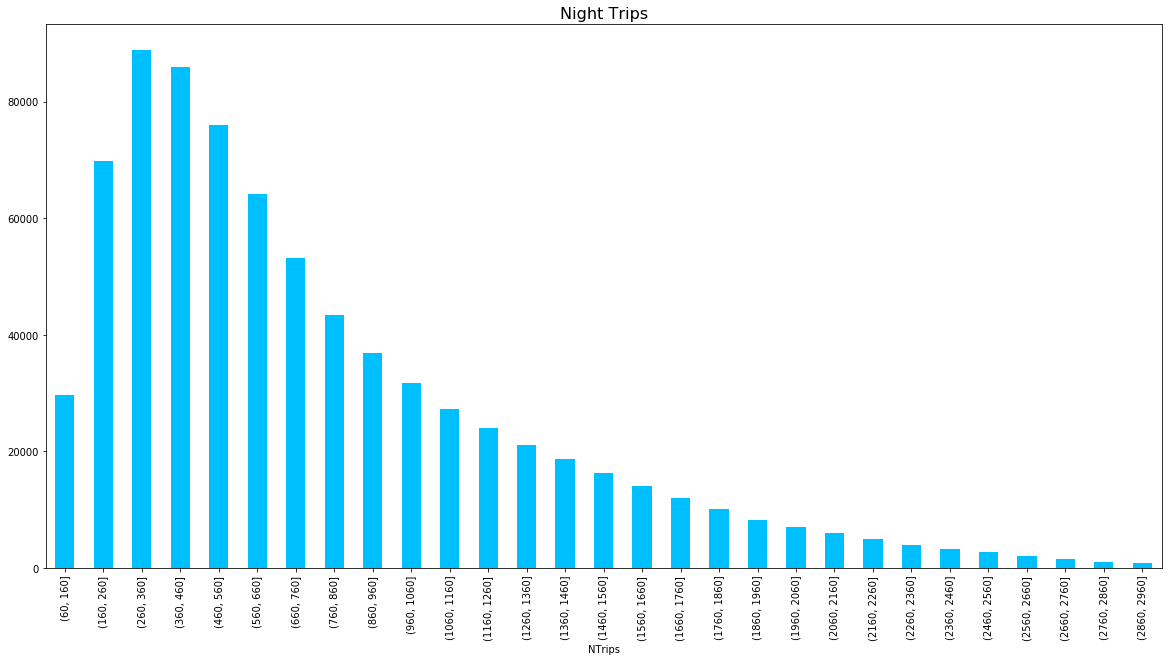

In [88]:
# plotting histograms for day riders and night riders
# this is a VERY USEFUL syntaxfor you to knonw!
pl.figure(figsize=(50,40))
bins = np.arange(60, 3000, 100)
axD = dfens.DTrips.groupby(pd.cut(dfens.DTrips, bins)).agg([count_nonzero]).plot(kind='bar', color = '#FFD700', figsize=(20,10),
                                                                legend=False)
axD.set_title("Day Trips", fontsize=16)
axN = dfens.NTrips.groupby(pd.cut(dfens.NTrips, bins)).agg([count_nonzero]).plot(kind='bar', color = '#00BFFF', figsize=(20,10),
                                                                legend=False)
axN.set_title("Night Trips", fontsize=16)



              count_nonzero
DTrips                     
(60, 160]          0.005243
(160, 260]         0.008333
(260, 360]         0.009611
(360, 460]         0.007919
(460, 560]         0.006196
(560, 660]         0.005536
(660, 760]         0.006249
(760, 860]         0.005625
(860, 960]         0.005756
(960, 1060]        0.005898
(1060, 1160]       0.005787
(1160, 1260]       0.005526
(1260, 1360]       0.005309
(1360, 1460]       0.004641
(1460, 1560]       0.003535
(1560, 1660]       0.002542
(1660, 1760]       0.001612
(1760, 1860]       0.001141
(1860, 1960]       0.000745
(1960, 2060]       0.000576
(2060, 2160]       0.000756
(2160, 2260]       0.000837
(2260, 2360]       0.000681
(2360, 2460]       0.000608
(2460, 2560]       0.000569
(2560, 2660]       0.000461
(2660, 2760]       0.000373
(2760, 2860]       0.000199
(2860, 2960]       0.000000


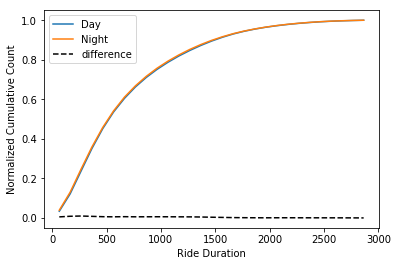

In [89]:
#print the cumulative sum curves for day and night trips

csD=dfens.DTrips.groupby(pd.cut(dfens.DTrips, bins)).agg([count_nonzero]).cumsum()

csN=dfens.NTrips.groupby(pd.cut(dfens.NTrips, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csD / csD.max()-csN / csN.max()))

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "Day")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "Night")
pl.plot(bins[:-1] + 5, np.sqrt(csN / csN.max() - csD / csD.max())**2, 'k--',
        label = "difference")
pl.xlabel("Ride Duration")
pl.ylabel("Normalized Cumulative Count")
pl.legend()

## Generating samples from the two groups

In [44]:
# Extracting 1 rides by every 200 rides.
dfens.DTripSam = np.arange(0, len(dfens.DTrips), 200)
dfens.NTrip200 = np.arange(0, len(dfens.NTrips), 200)

In [45]:
if len(dfens.DTripSam) == len(dfens.NTrip200):
    print("Yes, good to go!")
else:
    dfens.DTrip200 = np.random.choice(dfens.DTripSam, 3865)
    if len(dfens.DTrip200) == len(dfens.NTrip200):
        print("Same sample size. Please proceed!")

Same sample size. Please proceed!


## KS

In [46]:
# I am going to do two KS test. 
    # One for the complete groups. 
    # The second test will be on the selected samples obtained.
# First, KS test for the complete group
KS_com = scipy.stats.ks_2samp(dfens.DTrips, dfens.NTrips)
print("KS Test Result for complete set:\n", "D stats:", KS_com[0],"\n", "P-value:", KS_com[1])

KS Test Result for complete set:
 D stats: 0.010681298990470905 
 P-value: 9.254855605582419e-54


In [47]:
# Second, KS test for the extracted samples. 
KS_sam = scipy.stats.ks_2samp(dfens.DTrip200, dfens.NTrip200)
print("KS Test Result for samples:\n", "D stats:", KS_sam[0],"\n", "P-value:", KS_sam[1])

KS Test Result for samples:
 D stats: 0.5611901681759379 
 P-value: 0.0


### Interpretation
#### D statistic shows maximum distance between the two curves on cumulative sum plot. It shows the likelihood of two sample set are different. In this case, the D statistic value is 0.56. Therefore, the 2 sample sets are relatively similarly distributed.

#### P value is for testing the Null Hypothesis. We have chosed the alpha = 0.05 as significance level. P is way smaller than 0.05, we can reject the null hypothesis.¶


## Pearson's

In [48]:
pearson_value_trip = scipy.stats.pearsonr(sorted(dfens.DTrip200), sorted(dfens.NTrip200))
print("Results of Pearson test:\n","Pearson Coefficient Correlation:", pearson_value_trip[0], "\n", "P-value:",pearson_value_trip[1])

Results of Pearson test:
 Pearson Coefficient Correlation: 0.999925532222814 
 P-value: 0.0


### Interpretation
#### The Coefficient Correlation is very close to 1, which states a strong positive correlation between the two samples' distribution. It means they are very similarly distribution
#### P-value is 0.0 which in this case is possibly not super referential. However, with such small, less than 0.05, we can reject the null hypothesis, as the distribution are definitely not identical. 

## Spearman's

In [49]:
spearman_value_trip = scipy.stats.spearmanr(sorted(dfens.DTrip200), sorted(dfens.NTrip200))
print("Results of Spearmean test:\n","Spearman rank-order correlation coefficient:", spearman_value_trip[0], "\n", "P-value:",spearman_value_trip[1] )

Results of Spearmean test:
 Spearman rank-order correlation coefficient: 0.9999999529758042 
 P-value: 0.0


### Interpretation
#### The correlation coefficient is very close to 1, stating the two samples have positiviely strong correlation. 
#### P-value is this case, is 0 which possibly does not speak much. However, with such small, less than 0.05, we can reject the null hypothesis, as the distribution are definitely not identical. 

# EXTRA CREDIT: Age of bikers for trips originating in Manhattan and in Brooklyn


## Hypothesis Formation
Based on the Citibike station map, there are more stations in Manhattan then in Brooklyn. At the same time, the road condition in Manhattan makes it a bit more difficult to bike than in Brooklyn. 

Map can be accessed [here](https://member.citibikenyc.com/map/)

Therefore, I think there would be signifcant difference of biker age distribution between Manhattan and Brooklyn. 

### Null Hypothesis: there is no significant statistical difference in the trip duration distribution between day trips and night trips. 
$H_0: AD$<sub>$Manhattan$</sub> $= AD$<sub>$Brooklyn$</sub>

$H_1: AD$<sub>$Manhattan$</sub> $\neq$ $AD$<sub>$Brooklyn$</sub>

AD stands for age distribution. 

$\alpha$ = 0.05

#### Markdown reference:
http://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/

## Import Data
Using same dataset as the trip day vs night section: 2017 Jan and 2017 Aug

In [50]:
# Re-choose which columns to drop
dfw.columns

Index(['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender', 'date'],
      dtype='object')

In [51]:
dfc.columns

Index(['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender', 'date'],
      dtype='object')

In [52]:
dfnew = pd.merge(dfc, dfw, how='outer')
dfnew.head(5)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,date
0,680.0,2017-01-01 00:00:21,2017-01-01 00:11:41,3226.0,W 82 St & Central Park West,40.782750,-73.971370,3165.0,Central Park West & W 72 St,40.775794,-73.976206,25542.0,Subscriber,1965.0,2.0,2017-01-01 00:00:21
1,1282.0,2017-01-01 00:00:45,2017-01-01 00:22:08,3263.0,Cooper Square & E 7 St,40.729236,-73.990868,498.0,Broadway & W 32 St,40.748549,-73.988084,21136.0,Subscriber,1987.0,2.0,2017-01-01 00:00:45
2,648.0,2017-01-01 00:00:57,2017-01-01 00:11:46,3143.0,5 Ave & E 78 St,40.776829,-73.963888,3152.0,3 Ave & E 71 St,40.768737,-73.961199,18147.0,Customer,NaN,0.0,2017-01-01 00:00:57
3,631.0,2017-01-01 00:01:10,2017-01-01 00:11:42,3143.0,5 Ave & E 78 St,40.776829,-73.963888,3152.0,3 Ave & E 71 St,40.768737,-73.961199,21211.0,Customer,NaN,0.0,2017-01-01 00:01:10
4,621.0,2017-01-01 00:01:25,2017-01-01 00:11:47,3143.0,5 Ave & E 78 St,40.776829,-73.963888,3152.0,3 Ave & E 71 St,40.768737,-73.961199,26819.0,Customer,NaN,0.0,2017-01-01 00:01:25


In [53]:
dfnew_c = dfw.drop(['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type','Gender', 'date'], axis=1)
dfnew_c.head(3)

,Start Station Latitude,Start Station Longitude,Birth Year
0,40.743453,-74.000040,1978.0
1,40.724910,-74.001547,1978.0
2,40.775794,-73.976206,1962.0


In [54]:
dfnew_c['Coordinates'] = dfnew_c[['Start Station Latitude','Start Station Longitude']].apply(tuple,axis=1)
dfnew_c.head(3)

,Start Station Latitude,Start Station Longitude,Birth Year,Coordinates
0,40.743453,-74.000040,1978.0,"(40.74345335, -74.00004031)"
1,40.724910,-74.001547,1978.0,"(40.72490985, -74.00154702)"
2,40.775794,-73.976206,1962.0,"(40.77579376683666, -73.97620573639871)"


In [55]:
# Install the Package
!pip install --user reverse_geocoder

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [56]:
import reverse_geocoder as rg
x = tuple(dfnew_c['Coordinates'])
coordinate = x
results = rg.search(coordinate)
#print(results)

location = []

for i in range (len(results)):
    location.append(results[i]['name'])
dfnew_c['loc'] = location
dfnew_c.head()

Loading formatted geocoded file...


,Start Station Latitude,Start Station Longitude,Birth Year,Coordinates,loc
0,40.743453,-74.000040,1978.0,"(40.74345335, -74.00004031)",New York City
1,40.724910,-74.001547,1978.0,"(40.72490985, -74.00154702)",New York City
2,40.775794,-73.976206,1962.0,"(40.77579376683666, -73.97620573639871)",Manhattan
3,40.710446,-73.965251,1990.0,"(40.71044554, -73.96525063)",Long Island City
4,40.778627,-73.957721,1983.0,"(40.77862688, -73.95772073)",Manhattan


In [57]:
# Split the two groups by Starting Point
#['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
# Here, I tried a lot of times to deal with the 'Series' object not callable error due to the wrong position of brackets.

dfnew_c["MRide"] = 2017 - dfnew_c['Birth Year'][(dfnew_c["loc"] == 'Manhattan')]
dfnew_c["BRide"] = 2017 - dfnew_c['Birth Year'][(dfnew_c["loc"] == 'Brooklyn')]
dfnew_c.head()

,Start Station Latitude,Start Station Longitude,Birth Year,Coordinates,loc,MRide,BRide
0,40.743453,-74.000040,1978.0,"(40.74345335, -74.00004031)",New York City,NaN,NaN
1,40.724910,-74.001547,1978.0,"(40.72490985, -74.00154702)",New York City,NaN,NaN
2,40.775794,-73.976206,1962.0,"(40.77579376683666, -73.97620573639871)",Manhattan,55.0,NaN
3,40.710446,-73.965251,1990.0,"(40.71044554, -73.96525063)",Long Island City,NaN,NaN
4,40.778627,-73.957721,1983.0,"(40.77862688, -73.95772073)",Manhattan,34.0,NaN


In [81]:
dfnew_c["MRide"].dropna(inplace=True)
dfnew_c["BRide"].dropna(inplace=True)

In [82]:
# Extracting 1 rides by every 100 rides.
dfnew_c.MRide200 = np.arange(0, len(dfnew_c.MRide), 100)
dfnew_c.BRide200 = np.arange(0, len(dfnew_c.BRide), 100)

In [83]:
print(len(dfnew_c.MRide200), len(dfnew_c.BRide200))

2895 689


Text(0.5,1,'Brooklyn Trips')

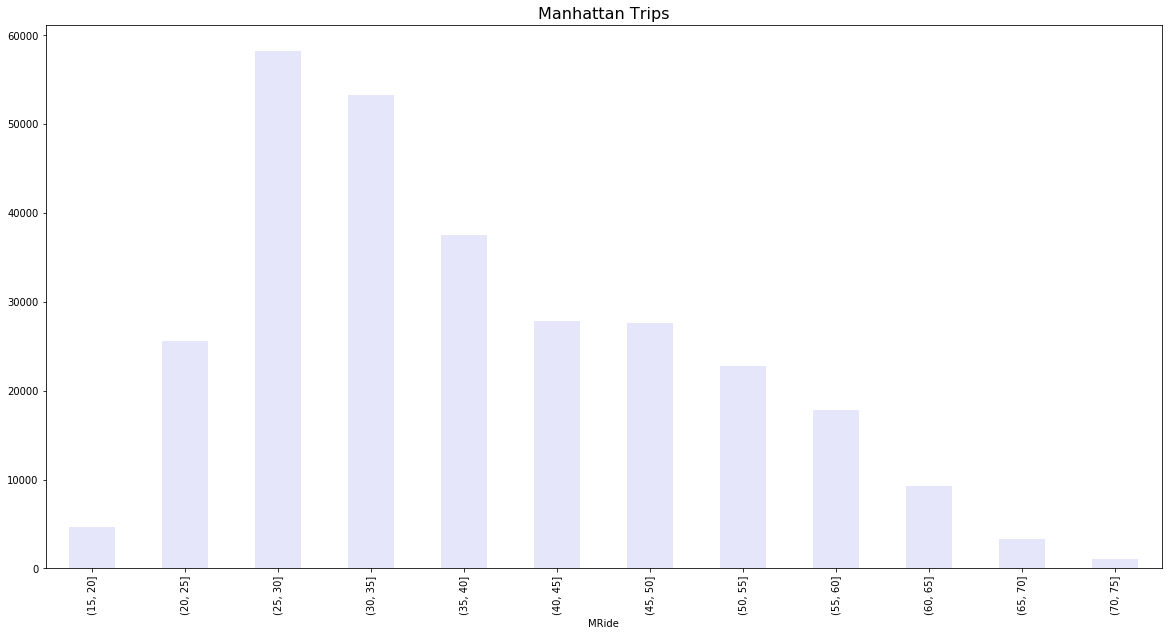

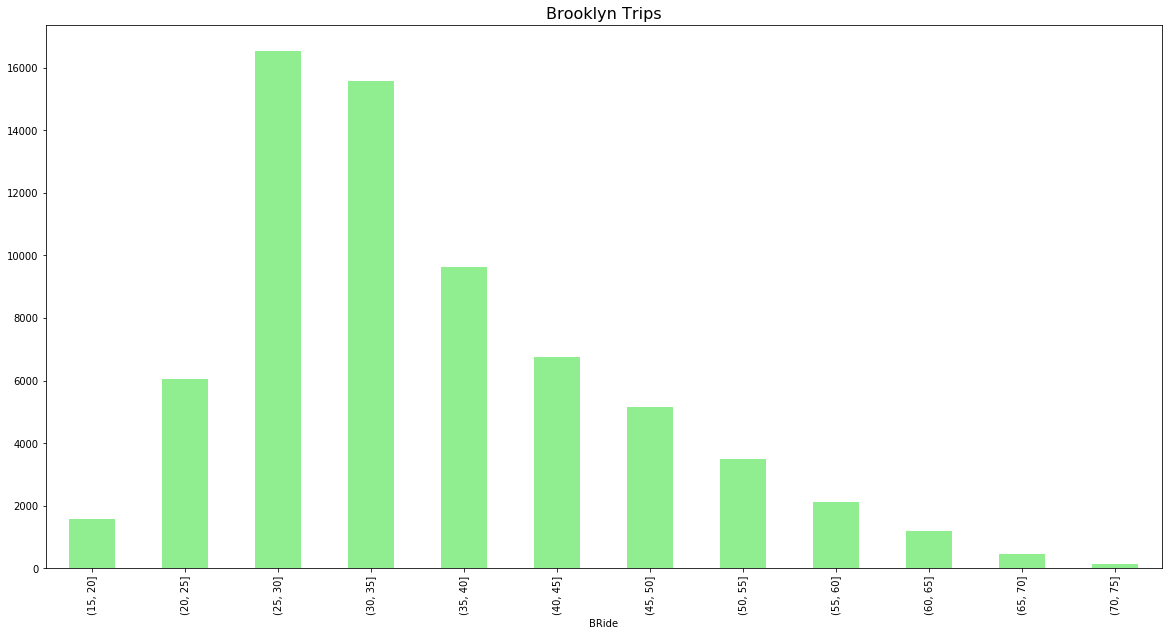

In [84]:
# plotting histograms for age distribution of Manhattan
# this is a VERY USEFUL syntaxfor you to knonw!
pl.figure(figsize=(50,40))
bins = np.arange(15, 80, 5)
axMA = dfnew_c.MRide.groupby(pd.cut(dfnew_c.MRide, bins)).agg([count_nonzero]).plot(kind='bar', color = '#E6E6FA', figsize=(20,10),
                                                                legend=False)
axMA.set_title("Manhattan Trips", fontsize=16)
axBR = dfnew_c.BRide.groupby(pd.cut(dfnew_c.BRide, bins)).agg([count_nonzero]).plot(kind='bar', color = '#90EE90', figsize=(20,10),
                                                                legend=False)
axBR.set_title("Brooklyn Trips", fontsize=16)

          count_nonzero
MRide                  
(15, 20]       0.006847
(20, 25]       0.006469
(25, 30]       0.045635
(30, 35]       0.088155
(35, 40]       0.098719
(40, 45]       0.101041
(45, 50]       0.080520
(50, 55]       0.052182
(55, 60]       0.021382
(60, 65]       0.006627
(65, 70]       0.001828
(70, 75]       0.000000


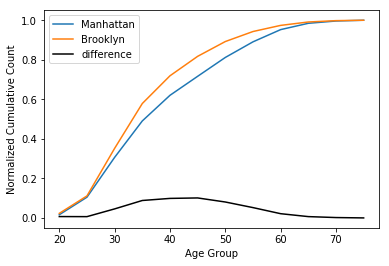

In [85]:
#print the cumulative sum curves for day and night trips

csMA=dfnew_c.MRide.groupby(pd.cut(dfnew_c.MRide, bins)).agg([count_nonzero]).cumsum()

csBR=dfnew_c.BRide.groupby(pd.cut(dfnew_c.BRide, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csMA / csMA.max()-csBR / csBR.max()))

pl.plot(bins[:-1] + 5, csMA / csMA.max(), label = "Manhattan")
pl.plot(bins[:-1] + 5, csBR / csBR.max(), label = "Brooklyn")
pl.plot(bins[:-1] + 5, np.sqrt(csBR / csBR.max() - csMA / csMA.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age Group")
pl.ylabel("Normalized Cumulative Count")
pl.legend()

## Generating Samples for Statistical Analysis

In [74]:
np.random.seed(12345)
if len(dfnew_c.MRide200) == len(dfnew_c.BRide200):
    print("Yes, good to go!")
else:
    dfnew_c.MRide200N = np.random.choice(dfnew_c.MRide200, len(dfnew_c.BRide200))
    if len(dfnew_c.MRide200N) == len(dfnew_c.BRide200):
        print("Same sample size. Please proceed!")

Same sample size. Please proceed!


## KS

In [63]:
# I am going to do two KS test. 
    # One for the complete groups. 
    # The second test will be on the selected samples obtained.
# First, KS test for the complete group
KS_all = scipy.stats.ks_2samp(dfnew_c.MRide, dfnew_c.BRide)
print("KS Test Result for complete set:\n", "D stats:", KS_all[0],"\n", "P-value:", KS_all[1])

KS Test Result for complete set:
 D stats: 0.10065834511420835 
 P-value: 0.0


In [64]:
# Second, KS test for the extracted samples. 
KS_samp = scipy.stats.ks_2samp(dfnew_c.MRide200N, dfnew_c.BRide200)
print("KS Test Result for samples:\n", "D stats:", KS_samp[0],"\n", "P-value:", KS_samp[1])

KS Test Result for samples:
 D stats: 0.7663280116110305 
 P-value: 1.5267096169126712e-178


### My Interpretation:
#### D statistic shows maximum distance between the two curves on cumulative sum plot. This value reflects the likelihood of two sample set being different. The D statistic value is 0.10 for all data and 0.77 for random samples. The sample generated are random and it is likely that they are more different than the actual complete dataset as they may be extracted from certain ranges. Therefore, the 2 complete datasets are possibly having similar distribution (night rider vs day rider). 

#### P value is for testing the Null Hypothesis. We have chosed the alpha = 0.05 as significance level. P is way smaller than 0.05, we reject the null hypothesis.¶

## Pearson's

In [65]:
pearson_value_trip = scipy.stats.pearsonr(sorted(dfnew_c.MRide200N), sorted(dfnew_c.BRide200))
print("Results of Pearson test:\n","Pearson Coefficient Correlation:", pearson_value_trip[0], "\n", "P-value:",pearson_value_trip[1])

Results of Pearson test:
 Pearson Coefficient Correlation: 0.999498041561603 
 P-value: 0.0


### Interpretation
#### The correlation coefficient is very close to 1, stating the two samples set that have chosen showing positiviely strong correlation. 

#### P-value is this case, is 0 which possibly does not speak much. However, with such small, less than 0.05, we can reject the null hypothesis, as the distribution are definitely not identical. 

##  Spearman's 

In [66]:
spearman_value_trip = scipy.stats.spearmanr(sorted(dfnew_c.MRide200N), sorted(dfnew_c.BRide200))
print("Results of Spearmean test:\n","Spearman rank-order correlation coefficient:", spearman_value_trip[0], "\n", "P-value:",spearman_value_trip[1] )

Results of Spearmean test:
 Spearman rank-order correlation coefficient: 0.9999992203788742 
 P-value: 0.0


### Interpretation
#### The correlation coefficient is super close to 1, demonstrating that the two samples set have selected for testing are having positiviely strong correlation. 

#### P-value is this case, is 0 which possibly does not speak much. However, with such small, less than 0.05, we can reject the null hypothesis, as the distribution are definitely not identical. 